In [3]:
import pandas as pd
import numpy as np

import os
import glob
from IPython.display import display, clear_output
from IPython.core.display import display, HTML

from tqdm.notebook import tqdm

#visualization
import matplotlib.pyplot as plt

# visualization version 2
import plotly.express as px
import plotly.graph_objects as go  
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut


import geopy.distance


In [5]:
display(HTML("<style>.container { width:80% !important; }</style>"))
display(HTML("<style>.output_result { max-width:200% !important; }</style>"))
display(HTML("<style>.output_result { max-height:300% !important; }</style>"))

display(HTML("<style>.prompt { display:none !important; }</style>"))

### Data Loading

In [6]:
Path = r"C:\Users\Samsung\Desktop\all\Project\23_VRPTW\Data\GiveFood"

In [7]:
fbank = pd.read_csv(Path +"\\foodbanks.csv")
locations = pd.read_json(Path + "\\locations.json")
needs = pd.read_json(Path + "\\needs.json")

# Data Engineering

In [10]:
# Foodbank
fb = fbank.copy()
fb = fb.drop(labels=["slug","phone","email","url","shopping_list_url","charity_register_url"],axis=1)
la_list,lng_list = [],[]
for i in range(len(fb)):
    lat_,lng_ = fb["latt_long"][i].split(",")
    la_list.append(lat_)
    lng_list.append(lng_)
fb["lat"] = la_list
fb["lng"] = lng_list

In [12]:
# locations
lo = locations.copy()
lo = lo.drop(labels = ["slug","phone","email","urls"],axis=1)

In [13]:
f_list,ne_list,la_list,lng_list = [],[],[],[]
for i in range(len(lo)):
    all_ = lo["foodbank"][i]
    f_name = all_["name"]
    network = all_["network"]
    lat_,long_ = lo["lat_lng"][i].split(",")
    
    la_list.append(lat_)
    lng_list.append(long_)
    f_list.append(f_name)
    ne_list.append(network)
lo["f_name"] = f_list
lo["network"] = ne_list
lo["lat"] = la_list
lo["lng"] = lng_list
lo = lo.drop(labels=["foodbank","lat_lng"],axis=1)

In [13]:
# needs

In [14]:
need = needs.copy()
need = needs.drop(labels=["id","found","self"],axis=1)

In [15]:
fb_list = []
needs_list = []
excess_list = []
for i in range(len(need)):
    fb_list.append(need["foodbank"][i]["name"])
    needs_list.append(need["needs"][i].split('\n'))
    excess_list.append(need["excess"][i].split("\n"))
need["f_name"] = fb_list
need["needs"] = needs_list
need["excess"] = excess_list
need = need.drop(labels="foodbank",axis=1)

In [16]:
fb.head()

,name,address,postcode,parliamentary_constituency,mp,mp_party,ward,district,country,charity_number,closed,latt_long,network,lat,lng
0,Medway,Unit 19\r\nRiverside Estate\r\nSir Thomas Long...,ME2 4DP,Rochester and Strood,Kelly Tolhurst,Conservative,Strood Rural,Medway,England,1166505,False,"51.3880636,0.5191694",Trussell Trust,51.3880636,0.5191694
1,Himmah,Unit 2 Forest Court\r\nGamble Street\r\nRadfor...,NG7 4EX,Nottingham East,Nadia Whittome,Labour,Hyson Green & Arboretum,Nottingham,England,1161021,False,"52.9587924,-1.165417",IFAN,52.9587924,-1.165417
2,Euston,"28 Phoenix Road,\r\nLondon,\r\nNW1 1TA",NW1 1TA,Holborn and St Pancras,Keir Starmer,Labour,St. Pancras & Somers Town,Camden,England,1172880,False,"51.5303781,-0.1325498",Trussell Trust,51.5303781,-0.1325498
3,Northampton Hope Centre,Oasis House\r\n35-37 Campbell Street\r\nNortha...,NN1 3DS,Northampton South,Andrew Lewer,Conservative,Castle,West Northamptonshire,England,1015743,False,"52.2424865,-0.8962770999999999",IFAN,52.2424865,-0.8962770999999999
4,Noor,Noor Hall\r\nNoor St\r\nPreston\r\nPR1 1QS,PR1 1QS,Preston,Mark Hendrick,Labour Co-operative,St. Matthew's,Preston,England,NaN,False,"53.7657864,-2.6948046",IFAN,53.7657864,-2.6948046


In [18]:
lo.head()

,name,address,postcode,politics,f_name,network,lat,lng
0,Cottonmill,Cottonmill Community & Cycling Centre\r\n12 Ol...,AL1 2EF,"{'parliamentary_constituency': 'St Albans', 'm...",St Albans and District,Trussell Trust,51.7384166,-0.3312981
1,Merton Growbaby Hub,42 Graham Road\r\nMitcham\r\nCR4 2HA,CR4 2HA,{'parliamentary_constituency': 'Mitcham and Mo...,Wimbledon,Trussell Trust,51.41041870000001,-0.1592729
2,Catford,Salvation Army Catford\r\n23 - 25 Brownhill Ro...,SE6 2HE,{'parliamentary_constituency': 'Lewisham East'...,Lewisham,Trussell Trust,51.4460211,-0.017136
3,Hope Valley,"St Helen's Church,\r\n1 Main Rd,\r\nGrindlefor...",S32 2JN,{'parliamentary_constituency': 'Derbyshire Dal...,Chesterfield,Trussell Trust,53.2975772,-1.6323329
4,Emmanuel Chapel,Satchfield Crescent\r\nHenbury\r\nBristol\r\nB...,BS10 7BN,{'parliamentary_constituency': 'Bristol North ...,Bristol North West,Trussell Trust,51.5047201,-2.6203455


In [19]:
need.head()

,needs,excess,f_name
0,"[Meat - Not Corned Beef, Long Life Fruit Juice...","[Porridge Oats, Corned Beef, Pasta, Cereal, Ba...",Romsey
1,"[Instant Mash, Tins Of Soup & Cup-a-soups, Noo...","[Corned Beef, 500g & 1kg Dried Pasta, Red Kidn...",Brecon
2,"[1 Litre Cartons Breakfast Juice, Small Tins O...","[Tinned Soup, Baked Beans, Tomatoes, Pasta, Te...",Farnborough
3,"[Treats (Crisps, Chocolates / Haribo's / Boile...",[Pasta],Wimbledon
4,"[1 Litre Cartons Breakfast Juice, Small Tins O...","[Tinned Soup, Baked Beans, Tomatoes, Pasta, Te...",Farnborough


## About foodbanks which are not connected any loctions

In [123]:
lo_link_count = []
check_linked = []
for row,col in fb.iterrows():
    try:
        counts_ = lo["f_name"].value_counts()[col["name"]]
        linked_ = "Yes"
    except:
        counts_ = 0
        linked_ = "No"
    lo_link_count.append(counts_)
    check_linked.append(linked_)
fb["location_count"] = lo_link_count
fb["location_linked"] = check_linked

In [124]:
fb["location_count"].value_counts()

0      604
1       66
2       52
3       41
4       35
5       21
6       21
7       16
8       11
9        6
10       6
11       6
16       3
12       2
13       2
27       1
23       1
608      1
Name: location_count, dtype: int64

In [125]:
fb["location_count"].mean()

2.011173184357542

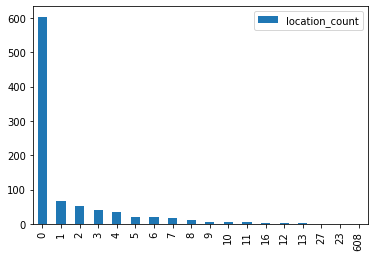

In [113]:
pd.DataFrame(fb["location_count"].value_counts()).plot(kind="bar")

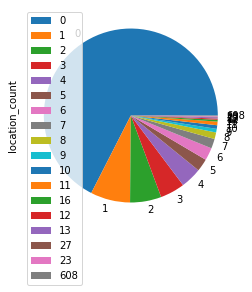

In [118]:
pd.DataFrame(fb["location_count"].value_counts()).plot.pie(y="location_count")

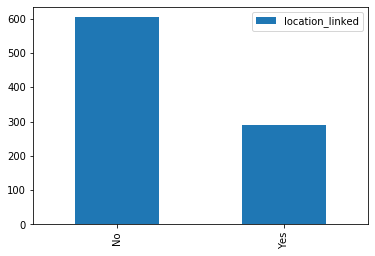

In [126]:
pd.DataFrame(fb["location_linked"].value_counts()).plot(kind="bar")

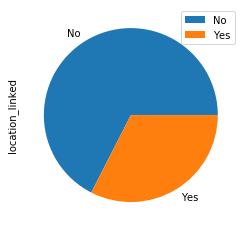

In [128]:
pd.DataFrame(fb["location_linked"].value_counts()).plot.pie(y="location_linked")

### considering network and check_linked

In [143]:
fb["network"].value_counts()

Trussell Trust    424
Independent       297
IFAN              168
Name: network, dtype: int64

In [144]:
fb[fb["network"]=="Trussell Trust"]["location_linked"].value_counts()

Yes    249
No     175
Name: location_linked, dtype: int64

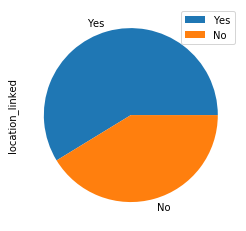

In [145]:
pd.DataFrame(fb[fb["network"]=="Trussell Trust"]["location_linked"].value_counts()).plot.pie(y="location_linked")

In [146]:
fb[fb["network"]=="Independent"]["location_linked"].value_counts()

No     276
Yes     21
Name: location_linked, dtype: int64

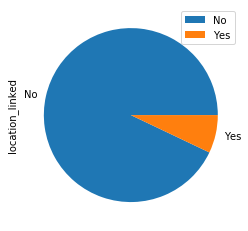

In [150]:
pd.DataFrame(fb[fb["network"]=="Independent"]["location_linked"].value_counts()).plot.pie(y="location_linked")

In [151]:
fb[fb["network"]=="IFAN"]["location_linked"].value_counts()

No     147
Yes     21
Name: location_linked, dtype: int64

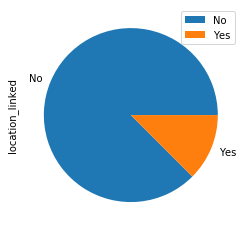

In [152]:
pd.DataFrame(fb[fb["network"]=="IFAN"]["location_linked"].value_counts()).plot.pie(y="location_linked")

# Visualization 

In [43]:
def Add_scatter(lngs,lats):
    fig.add_trace(go.Scattergeo(
    
            lon=lngs,
            lat=lats,
            #lon=fb["lon1"],
            #lat=fb["lat1"],
            mode="lines",
            line = dict(width = 0.5, color = 'black'))
    )

In [130]:
def scatter_basic_points(tar_fb,tar_lo,version=None):
    if version == "only":
        LONs = tar_fb[tar_fb["location_linked"]=="Yes"]["lng"].map(lambda x: float(x)).values
        LATs = tar_fb[tar_fb["location_linked"]=="Yes"]["lat"].map(lambda x: float(x)).values
    else:
        LONs = tar_fb["lng"].map(lambda x: float(x)).values
        LATs = tar_fb["lat"].map(lambda x: float(x)).values
    fig.add_trace(
        go.Scattergeo(
            locationmode="country names",
            lon= LONs,
            lat= LATs,
            #lon=fb["lon1"],
            #lat=fb["lat1"],
            name = "Food Bank",
            text=tar_fb["name"],
            marker=dict(
                size= 9,
                color="rgb(200,0,0)",
                line_color="rgb(122,0,0)",
                line_width=0.5,
                sizemode="diameter",
            ),
        )
    )
    fig.add_trace(
        go.Scattergeo(
            locationmode="country names",
            lon=tar_lo["lng"].map(lambda x: float(x)).values,
            lat=tar_lo["lat"].map(lambda x: float(x)).values,
            #lon=fb["lon1"],
            #lat=fb["lat1"],
            name = "location",
            text=tar_lo["name"],
            marker=dict(
                size=5,
                color="rgb(0,0,200)",
                line_color="rgb(0,0,122)",
                line_width=0.2,
                sizemode="area",

            ),
        )
    )

In [131]:
def making_layout():
    fig.update_layout(
        width = 1500,
        height = 1500,
        geo=dict(
            resolution=50,
            scope="europe",
            center={
                "lat": (float(tar_lo.lat.min()) + float(tar_lo.lat.max())) / 2,
                "lon": (float(tar_lo.lng.min()) + float(tar_lo.lng.max())) / 2,
            },
            projection=go.layout.geo.Projection(
                type="azimuthal equal area", scale=8
            ),
            landcolor="rgb(217, 217, 217)",
            showocean=True,
        )
    )

### Considering all network types with consideration of salvation army

In [46]:
tar_fb = fb.copy()
tar_lo = lo.copy()
fig = go.Figure()

scatter_basic_points(tar_fb,tar_lo)

tq = tqdm(set(tar_lo["f_name"]))
for test_fb in tq:
    print(test_fb)
    point_fb = tar_fb[tar_fb["name"]==test_fb].reset_index(drop=True)
    lo_list = tar_lo[tar_lo["f_name"]==test_fb]
    lo_list = lo_list.reset_index(drop=True)

    for i in range(len(lo_list)):
        lngs = [point_fb.lng[0],lo_list["lng"][i]]
        lats = [point_fb.lat[0],lo_list["lat"][i]]
        Add_scatter(lngs,lats)


Aberdeenshire North
Launceston
Micah Liverpool
Stroud District
Clay Cross
Basingstoke
Trafford South
Milton Keynes
Dunfermline
Caterham
Lincoln
East & West Nottingham
Colchester
Eastern Valley
Hart
Dundonald
North Ayrshire
Wells Vineyard
Ringwood
Swale
Highland
Luton
Tameside East
Glasgow NW
Llandrindod
Stamford & Oundle
Braintree Area
Rhondda
Shepway
Dover
Burnage
Taunton
Abingdon
Dagenham
South Normanton Area
Greenwich
Oldham
Ballymena
Taff-Ely
Boston
Bicester
DENS
Aberdeen North
Hackney
Flintshire
EK Community
Rutherglen & Cambuslang
Caithness
B30 & South Birmingham
Chichester District
Portsmouth
Hastings
3food4u
Tameside South & Longdendale
Shoreham
Sherwood Forest
Enniskillen
Collier Row & Romford
Bromley Borough
The Forest
Loveworks
Hillingdon
Manchester South Central
East Ayrshire
Ribble Valley
Hamilton District
Rhymney Valley
Salvation Army

Stoke-on-Trent
Ledbury
Glasgow NE
Warrington
Sutton
Newquay
Kingston
Larne
Broxbourne
North Lakes
Vale of Clwyd
Romsey
Causeway
Gravesham


In [47]:
making_layout()
fig.show()

### Considering all network types without consideration the salvation army

In [48]:
tar_fb = fb.copy()
tar_lo = lo.copy()
target_point = "Salvation Army"
fig = go.Figure()

scatter_basic_points(tar_fb,tar_lo)

tq = tqdm(set(tar_lo["f_name"]))
for test_fb in tq:
    if test_fb == target_point:
        pass
    else:
        print(test_fb)
        point_fb = tar_fb[tar_fb["name"]==test_fb].reset_index(drop=True)
        lo_list = tar_lo[tar_lo["f_name"]==test_fb]
        lo_list = lo_list.reset_index(drop=True)

        for i in range(len(lo_list)):
            lngs = [point_fb.lng[0],lo_list["lng"][i]]
            lats = [point_fb.lat[0],lo_list["lat"][i]]
            Add_scatter(lngs,lats)


Aberdeenshire North
Launceston
Micah Liverpool
Stroud District
Clay Cross
Basingstoke
Trafford South
Milton Keynes
Dunfermline
Caterham
Lincoln
East & West Nottingham
Colchester
Eastern Valley
Hart
Dundonald
North Ayrshire
Wells Vineyard
Ringwood
Swale
Highland
Luton
Tameside East
Glasgow NW
Llandrindod
Stamford & Oundle
Braintree Area
Rhondda
Shepway
Dover
Burnage
Taunton
Abingdon
Dagenham
South Normanton Area
Greenwich
Oldham
Ballymena
Taff-Ely
Boston
Bicester
DENS
Aberdeen North
Hackney
Flintshire
EK Community
Rutherglen & Cambuslang
Caithness
B30 & South Birmingham
Chichester District
Portsmouth
Hastings
3food4u
Tameside South & Longdendale
Shoreham
Sherwood Forest
Enniskillen
Collier Row & Romford
Bromley Borough
The Forest
Loveworks
Hillingdon
Manchester South Central
East Ayrshire
Ribble Valley
Hamilton District
Rhymney Valley
Stoke-on-Trent
Ledbury
Glasgow NE
Warrington
Sutton
Newquay
Kingston
Larne
Broxbourne
North Lakes
Vale of Clwyd
Romsey
Causeway
Gravesham
Fusion
Sparkhill

In [49]:
making_layout()
fig.show()

## About Network

In [135]:
fb["network"].value_counts()

Trussell Trust    424
Independent       297
IFAN              168
Name: network, dtype: int64

### Considering only Trussel Trust

In [132]:
fig = go.Figure()
tar_fb = fb[fb["network"]=="Trussell Trust"].copy()
tar_lo = lo[lo["network"]=="Trussell Trust"].copy()
scatter_basic_points(tar_fb,tar_lo,"only")
tq = tqdm(set(tar_lo["f_name"]))
for test_fb in tq:
    print(test_fb)
    point_fb = tar_fb[tar_fb["name"]==test_fb].reset_index(drop=True)
    lo_list = tar_lo[tar_lo["f_name"]==test_fb]
    lo_list = lo_list.reset_index(drop=True)

    for i in range(len(lo_list)):
        lngs = [point_fb.lng[0],lo_list["lng"][i]]
        lats = [point_fb.lat[0],lo_list["lat"][i]]
        Add_scatter(lngs,lats)

Aberdeenshire North
Launceston
Stroud District
Clay Cross
Basingstoke
Trafford South
Dunfermline
Caterham
Lincoln
East & West Nottingham
Colchester
Eastern Valley
Hart
Dundonald
North Ayrshire
Ringwood
Swale
Llandrindod
Tameside East
Glasgow NW
Stamford & Oundle
Braintree Area
Rhondda
Shepway
Dover
Burnage
Taunton
Abingdon
Dagenham
South Normanton Area
Greenwich
Oldham
Ballymena
Taff-Ely
Boston
Bicester
DENS
Aberdeen North
Hackney
Flintshire
Rutherglen & Cambuslang
Caithness
Chichester District
B30 & South Birmingham
Portsmouth
Hastings
Tameside South & Longdendale
Shoreham
Sherwood Forest
Enniskillen
Collier Row & Romford
Bromley Borough
The Forest
Hillingdon
Manchester South Central
East Ayrshire
Ribble Valley
Hamilton District
Rhymney Valley
Larne
Stoke-on-Trent
Glasgow NE
Warrington
Sutton
Newquay
Kingston
Broxbourne
North Lakes
Vale of Clwyd
Romsey
Causeway
Sparkhill
Aylesbury
Windermere & District
Antrim
Belfast South
Leicester South
North Belfast
Clevedon District
Manchester Cen

In [133]:
making_layout()
fig.show()

### Considering only IFAN

In [134]:
fig = go.Figure()
tar_fb = fb[fb["network"]=="IFAN"].copy()
tar_lo = lo[lo["network"]=="IFAN"].copy()
scatter_basic_points(tar_fb,tar_lo,"only")
tq = tqdm(set(tar_lo["f_name"]))
for test_fb in tq:
    #print(test_fb)
    point_fb = tar_fb[tar_fb["name"]==test_fb].reset_index(drop=True)
    lo_list = tar_lo[tar_lo["f_name"]==test_fb]
    lo_list = lo_list.reset_index(drop=True)

    for i in range(len(lo_list)):
        lngs = [point_fb.lng[0],lo_list["lng"][i]]
        lats = [point_fb.lat[0],lo_list["lat"][i]]
        Add_scatter(lngs,lats)
making_layout()
fig.show()

Trussell Trust    424
Independent       297
IFAN              168
Name: network, dtype: int64

### Considering only Independent

In [136]:
fig = go.Figure()
tar_fb = fb[fb["network"]=="Independent"].copy()
tar_lo = lo[lo["network"]=="Independent"].copy()
scatter_basic_points(tar_fb,tar_lo,"only")
tq = tqdm(set(tar_lo["f_name"]))
for test_fb in tq:
    #print(test_fb)
    point_fb = tar_fb[tar_fb["name"]==test_fb].reset_index(drop=True)
    lo_list = tar_lo[tar_lo["f_name"]==test_fb]
    lo_list = lo_list.reset_index(drop=True)

    for i in range(len(lo_list)):
        lngs = [point_fb.lng[0],lo_list["lng"][i]]
        lats = [point_fb.lat[0],lo_list["lat"][i]]
        Add_scatter(lngs,lats)
making_layout()
fig.show()

In [137]:
fb

,name,address,postcode,parliamentary_constituency,mp,mp_party,ward,district,country,charity_number,closed,latt_long,network,lat,lng,location_count,location_liked,location_linked
0,Medway,Unit 19\r\nRiverside Estate\r\nSir Thomas Long...,ME2 4DP,Rochester and Strood,Kelly Tolhurst,Conservative,Strood Rural,Medway,England,1166505,False,"51.3880636,0.5191694",Trussell Trust,51.3880636,0.5191694,8,Yes,Yes
1,Himmah,Unit 2 Forest Court\r\nGamble Street\r\nRadfor...,NG7 4EX,Nottingham East,Nadia Whittome,Labour,Hyson Green & Arboretum,Nottingham,England,1161021,False,"52.9587924,-1.165417",IFAN,52.9587924,-1.165417,0,No,No
2,Euston,"28 Phoenix Road,\r\nLondon,\r\nNW1 1TA",NW1 1TA,Holborn and St Pancras,Keir Starmer,Labour,St. Pancras & Somers Town,Camden,England,1172880,False,"51.5303781,-0.1325498",Trussell Trust,51.5303781,-0.1325498,0,No,No
3,Northampton Hope Centre,Oasis House\r\n35-37 Campbell Street\r\nNortha...,NN1 3DS,Northampton South,Andrew Lewer,Conservative,Castle,West Northamptonshire,England,1015743,False,"52.2424865,-0.8962770999999999",IFAN,52.2424865,-0.8962770999999999,0,No,No
4,Noor,Noor Hall\r\nNoor St\r\nPreston\r\nPR1 1QS,PR1 1QS,Preston,Mark Hendrick,Labour Co-operative,St. Matthew's,Preston,England,NaN,False,"53.7657864,-2.6948046",IFAN,53.7657864,-2.6948046,0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,East Yorkshire,Unit C Waltham House\r\nRiverview Road\r\nBeve...,HU17 8DY,Beverley and Holderness,Graham Stuart,Conservative,Minster and Woodmansey,East Riding of Yorkshire,England,1167071,False,"53.8443251,-0.4003779",Trussell Trust,53.8443251,-0.4003779,6,Yes,Yes
891,Brent,The Vestry Hall\r\nNeasden Lane\r\nLondon\r\nN...,NW10 2TS,Brent Central,Dawn Butler,Labour,Roundwood,Brent,England,NaN,False,"51.5496339,-0.2492333",Trussell Trust,51.5496339,-0.2492333,1,Yes,Yes
892,Chelmsford,PO Box 9174\r\nChelmsford\r\nCM1 9AE,CM1 9AE,Chelmsford,Vicky Ford,Conservative,Chelmer Village and Beaulieu Park,Chelmsford,England,1144804,False,"51.7355868,0.4685497",Trussell Trust,51.7355868,0.4685497,6,Yes,Yes
893,Deepings,"63, Hereward Way\r\nDeeping St James\r\nPeterb...",PE6 8QB,South Holland and The Deepings,John Hayes,Conservative,Deeping St. James,South Kesteven,England,NaN,False,"52.6718643,-0.2939364",Trussell Trust,52.6718643,-0.2939364,1,Yes,Yes


## About Political party

In [138]:
fb["mp_party"].value_counts()

Conservative           495
Labour                 200
Scottish National       78
Labour Co-operative     41
Liberal Democrats       23
DUP                     14
Sinn Féin                9
Plaid Cymru              8
Liberal Democrat         8
SDLP                     2
Speaker                  2
Green                    2
Alliance                 2
Name: mp_party, dtype: int64

In [153]:
fb[fb["mp_party"]=="Conservative"]["network"].value_counts()

Trussell Trust    234
Independent       181
IFAN               77
Name: network, dtype: int64

In [154]:
fb[fb["mp_party"]=="Labour"]["network"].value_counts()

Trussell Trust    102
Independent        52
IFAN               45
Name: network, dtype: int64

In [155]:
fb[fb["mp_party"]=="Scottish National"]["network"].value_counts()

Trussell Trust    29
IFAN              25
Independent       23
Name: network, dtype: int64

In [157]:
fb[fb["mp_party"]=="Conservative"]["location_linked"].value_counts()

No     339
Yes    156
Name: location_linked, dtype: int64

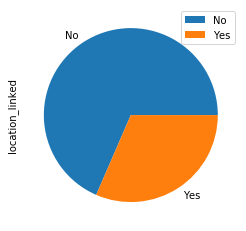

In [160]:
pd.DataFrame(fb[fb["mp_party"]=="Conservative"]["location_linked"].value_counts()).plot.pie(y="location_linked")

In [158]:
fb[fb["mp_party"]=="Labour"]["location_linked"].value_counts()

No     120
Yes     80
Name: location_linked, dtype: int64

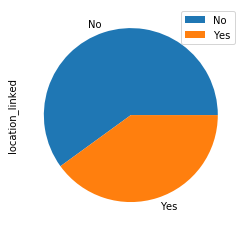

In [161]:
pd.DataFrame(fb[fb["mp_party"]=="Labour"]["location_linked"].value_counts()).plot.pie(y="location_linked")

In [159]:
fb[fb["mp_party"]=="Scottish National"]["location_linked"].value_counts()

No     55
Yes    23
Name: location_linked, dtype: int64

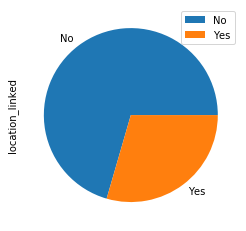

In [162]:
pd.DataFrame(fb[fb["mp_party"]=="Scottish National"]["location_linked"].value_counts()).plot.pie(y="location_linked")

# About needs

In [165]:
need

,needs,excess,f_name
0,"[Meat - Not Corned Beef, Long Life Fruit Juice...","[Porridge Oats, Corned Beef, Pasta, Cereal, Ba...",Romsey
1,"[Instant Mash, Tins Of Soup & Cup-a-soups, Noo...","[Corned Beef, 500g & 1kg Dried Pasta, Red Kidn...",Brecon
2,"[1 Litre Cartons Breakfast Juice, Small Tins O...","[Tinned Soup, Baked Beans, Tomatoes, Pasta, Te...",Farnborough
3,"[Treats (Crisps, Chocolates / Haribo's / Boile...",[Pasta],Wimbledon
4,"[1 Litre Cartons Breakfast Juice, Small Tins O...","[Tinned Soup, Baked Beans, Tomatoes, Pasta, Te...",Farnborough
...,...,...,...
95,"[Tinned Soup, Rice Pudding, Jams / Spreads, Ti...","[Pasta, Rice, Cereal]",Brent
96,"[Fray Bentos Pies, Tinned Potatoes, Cooking Oi...","[Pasta, Cereal, Tea]",Stroud District
97,"[Tinned Meats (Stewed Steak In Gravy, Minced B...","[Baked Beans, Tinned Spaghetti, Milk Substitut...",Callington
98,"[Bottles Of Squash, Tinned Peas, Carrots, Swee...",[],Grace


In [ ]:
need_all = []
exess_all = []
for row,col in need.iterrows():
    

## With foodbanks

In [164]:
need["f_name"].value_counts()

Brecon                     4
Farnborough                3
Wimbledon                  3
Penryn & Falmouth          2
Woking                     2
                          ..
DENS                       1
Hackney                    1
Stroud District            1
Rutherglen & Cambuslang    1
Romsey                     1
Name: f_name, Length: 81, dtype: int64

In [173]:
need[need["f_name"]=="Brecon"]["needs"][1]

['Instant Mash',
 'Tins Of Soup & Cup-a-soups',
 'Noodles',
 '500g Bags Of Rice',
 'Custard',
 'Tinned Fruit',
 'Savoury Biscuits, Crackers & Snacks',
 'Instant Coffee',
 'Tinned Vegetables',
 'UHT Milk - Full Cream',
 'Sponge Puddings',
 'Instant Porridge',
 'Tinned Meat',
 'Meals That Need No Cooking',
 'Dried Dog Food For Puppies',
 'Washing Up Liquid',
 "'Baby' Toothpaste And Toothbrushes"]

In [174]:
need[need["f_name"]=="Brecon"]["needs"][34]

['Instant Mash',
 'Noodles',
 '500g Bags Of Rice',
 'Long-life Fruit Juice',
 'Custard',
 'Tinned Fruit',
 'Savoury Biscuits, Crackers & Snacks',
 'Tins Of Soup & Cup-a-soups',
 'Instant Coffee',
 'Tinned Vegetables',
 'UHT Milk - Full Cream',
 'Sponge Puddings',
 'Meals That Need No Cooking',
 'Dried Dog Food For Puppies']